# PCA Class

In [1]:
import urllib.request
url = 'https://bit.ly/fruits_300_data'
filename = 'fruits_300.npy'
urllib.request.urlretrieve(url, filename)

('fruits_300.npy', <http.client.HTTPMessage at 0x1d254f8e0d0>)

In [4]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
print(pca.components_.shape)

(50, 10000)


In [8]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)     # n은 샘플 개수
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수임. 그러지 않으면 10개.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n개까지만 그림.
                axs[i,j].imshow(arr[i*10 + j], cmap = 'gray_r')
            axs[i,j].axis('off')
    plt.show()

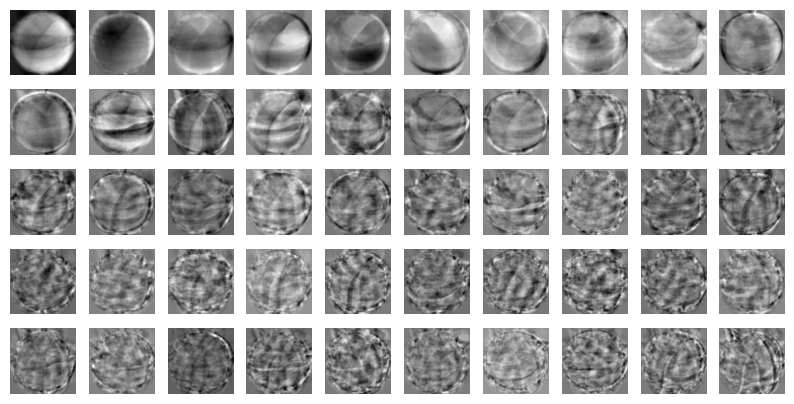

In [9]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [10]:
print(fruits_2d.shape)

(300, 10000)


In [12]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성

In [13]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


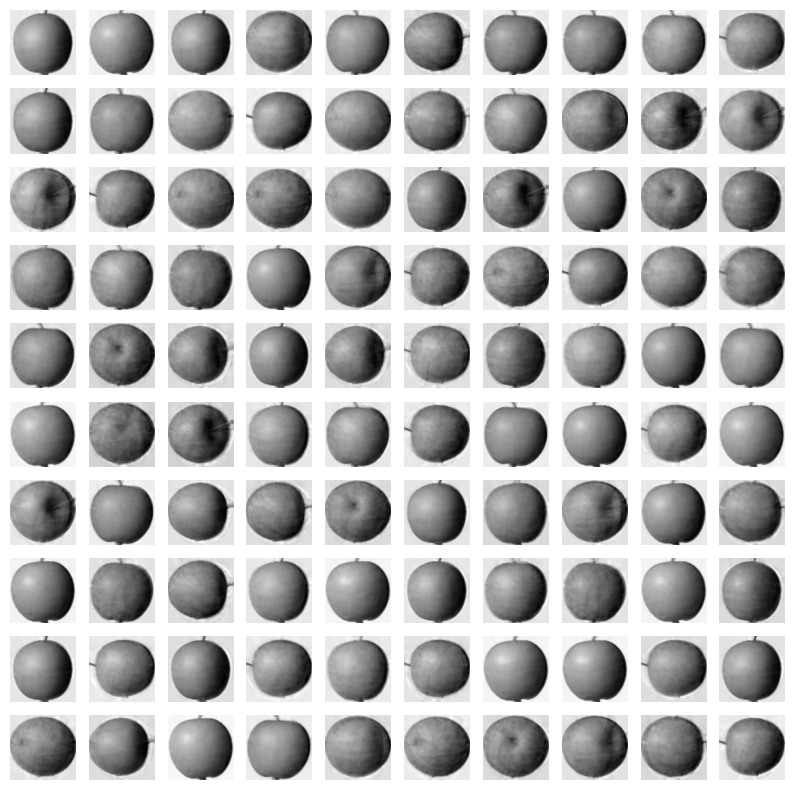

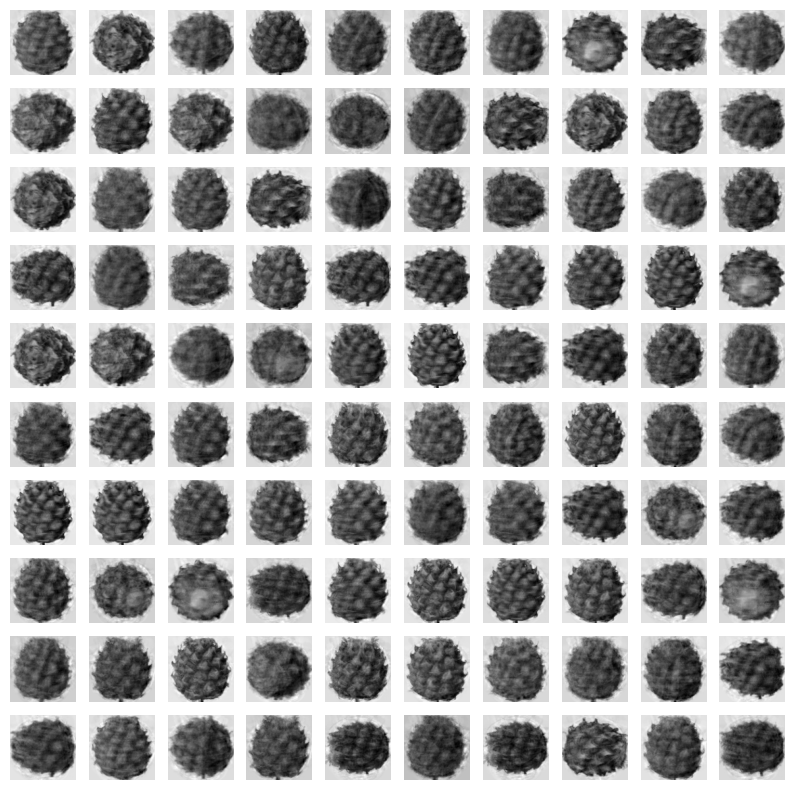

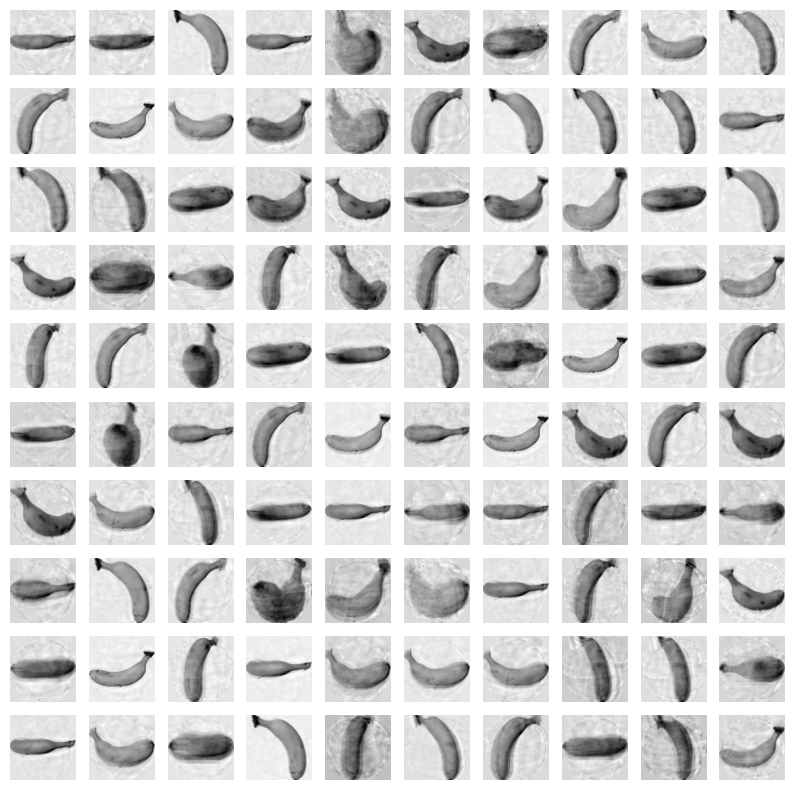

In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

# Explained Variance

In [16]:
print(np.sum(pca.explained_variance_ratio_))    # 50개 주성분이 유지하고 있는 분산

0.9214844277409582


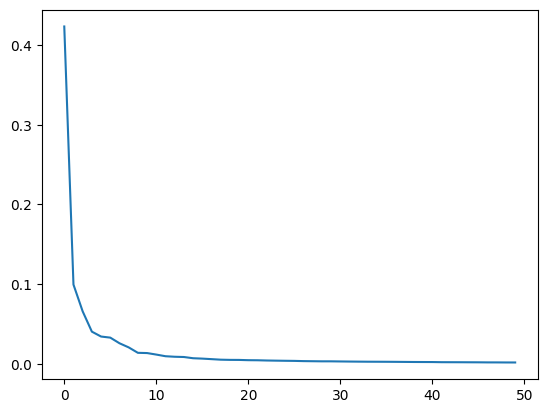

In [17]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [20]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486383, 0.00480346,
       0.00447835, 0.00437317, 0.00408038, 0.00389469, 0.00372443,
       0.00359285, 0.00331476, 0.00317818, 0.00304289, 0.00303753,
       0.00288918, 0.00275738, 0.00264932, 0.0025575 , 0.00252081,
       0.00247317, 0.00239419, 0.002304  , 0.00221466, 0.00216494,
       0.00213554, 0.00196367, 0.00192781, 0.001901  , 0.00184577,
       0.00180205, 0.00169891, 0.00168719, 0.00162149, 0.00159839])

# 다른 알고리즘과 함께 사용하기

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [23]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [24]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.31554903984069826


In [26]:
# 위의 cell과 PCA로 축소한 fruits_pca를 사용했을 때와 비교
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.016871309280395506


In [27]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)    # 원하는 설명된 분산의 비율을 입력할 수 도 있음.

PCA(n_components=0.5)

In [28]:
print(pca.n_components_)    # 50%의 설명된 분산 비율을 위해서는 2개의 주성분이 필요함.

2


In [40]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [30]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.023796844482421874


C:\Users\LeeSooHwan\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LeeSooHwan\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [43]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


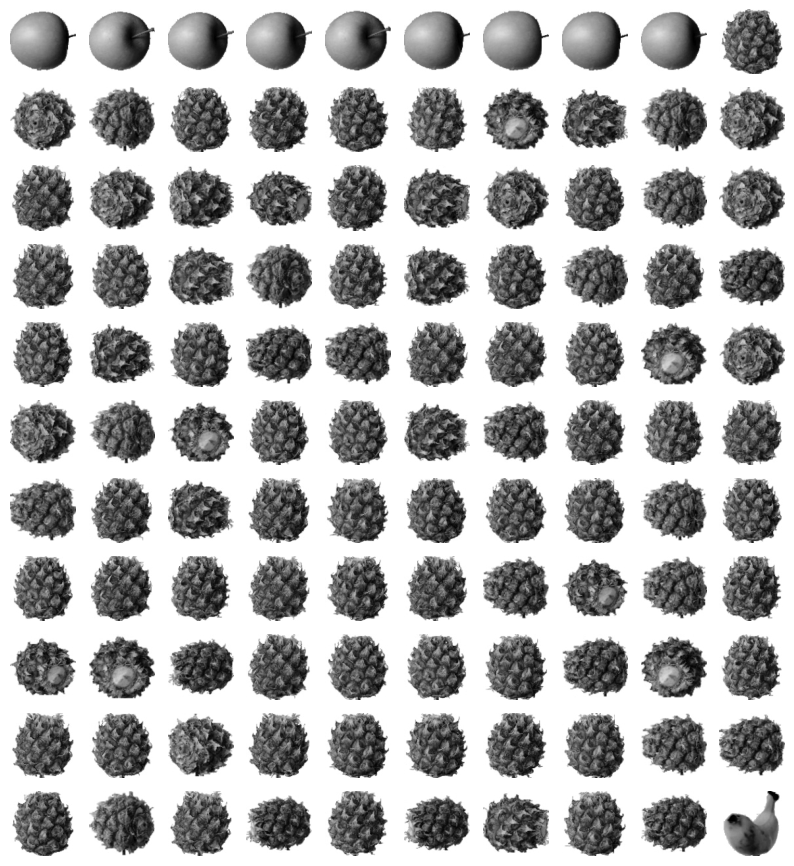

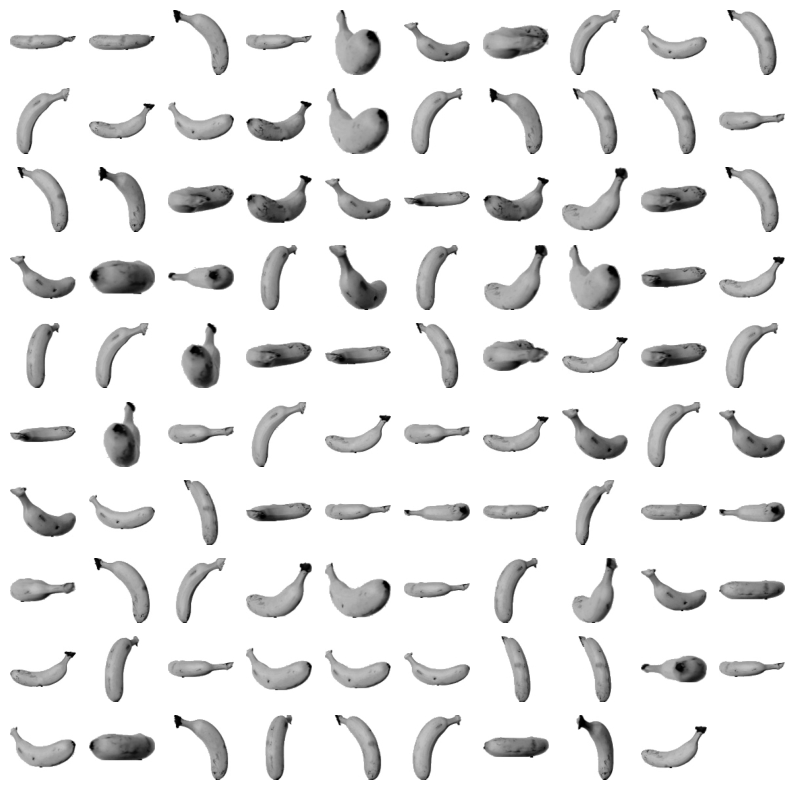

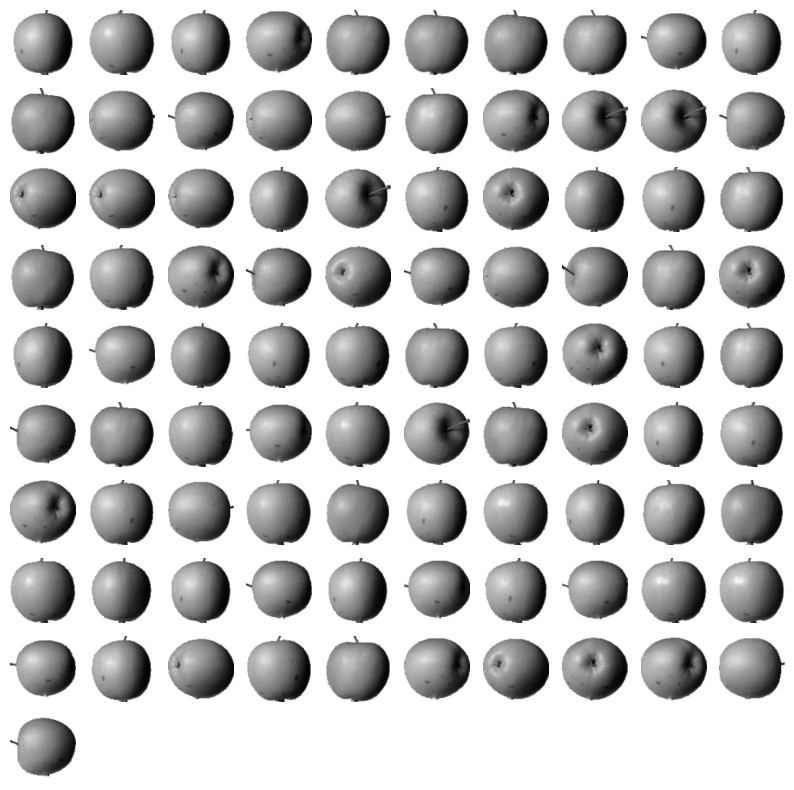

In [44]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

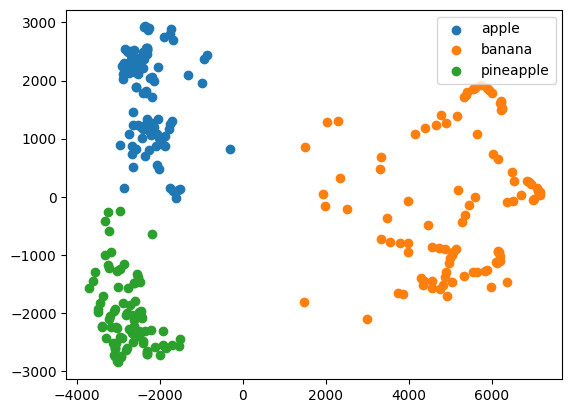

In [46]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()